# Python 标准库

## time 库

**Python处理时间的标准库**

**1、获取现在时间**

（1）time.localtime() 本地时间

（2）time.gmtime() UTC世界统一时间

北京时间比世界统一时间 UTC 早 8 个小时

In [1]:
import time

t_local = time.localtime()
t_UtC = time.gmtime()
print('t_local', t_local)
print('t_UTC', t_UtC)

t_local time.struct_time(tm_year=2020, tm_mon=4, tm_mday=1, tm_hour=17, tm_min=27, tm_sec=47, tm_wday=2, tm_yday=92, tm_isdst=0)
t_UTC time.struct_time(tm_year=2020, tm_mon=4, tm_mday=1, tm_hour=9, tm_min=27, tm_sec=47, tm_wday=2, tm_yday=92, tm_isdst=0)


In [3]:
time.ctime()          # 返回本地时间的字符串

'Wed Apr  1 17:28:44 2020'

**2、时间戳与计时器**

（1）time.time() 返回自纪元以来的秒数，记录 sleep

（2）time.perf_counter() 随意选取一个时间点，记录现在时间到该时间点的间隔秒数，记录 sleep

（3）time.process_time() 随意选取一个时间点，记录现在时间到该时间点的间隔秒数，不记录 sleep

perf_counter() 精度较 time() 更高一些

In [4]:
t_1_start = time.time()
t_2_start = time.perf_counter()
t_3_start = time.process_time()

print(t_1_start)
print(t_2_start)
print(t_3_start)

res = 0
for i in range(1000000):
    res += i
    
time.sleep(5)     # process_time 会把 sleep 的时间去掉
t_1_end = time.time()
t_2_end = time.perf_counter()
t_3_end = time.process_time()

print('time方法：{:.3f}秒'.format(t_1_end-t_1_start))
print('perf_counter方法：{:.3f}秒'.format(t_2_end-t_2_start))
print('process_time方法：{:.3f}秒'.format(t_3_end-t_3_start))

1585734238.9842937
1761.5337528
2.125
time方法：5.141秒
perf_counter方法：5.142秒
process_time方法：0.141秒


**3、格式化**

（1）time.strftime 自定义格式化输出

In [5]:
lctime = time.localtime()
time.strftime('%Y-%m-%d %A %H:%M:%S')

'2020-04-01 Wednesday 17:48:06'

**4、睡觉**

## random 库

随机数在计算机应用中十分常见

Python 通过 random库 提供各种伪随机数

基本可以用于除加密解密算法外的大多数工程应用

**1、随机种子————seed(a=None)**

（1）相同种子会产生相同的随机数

（2）如果不设置随机种子，以系统当前时间为默认值

In [6]:
from random import *

seed(10)
print(random())
seed(10)
print(random())

0.5714025946899135
0.5714025946899135


In [7]:
print(random())

0.4288890546751146


**2、产生随机整数**

（1）randint(a,b)————产生 [a,b]之间 的随机整数

In [10]:
numbers = [randint(1, 10) for i in range(10)]
numbers

[5, 5, 8, 3, 5, 6, 3, 8, 4, 8]

（2）randrange(a)————产生 [0,a)之间 的随机整数

In [11]:
numbers = [randrange(10) for i in range(10)]
numbers

[9, 6, 0, 9, 0, 3, 2, 3, 4, 8]

（3）randrange(a,b,step)————产生 [a,b)之间 以step为步长 的随机整数

In [12]:
numbers = [randrange(0, 10, 2) for i in range(10)]
numbers

[4, 2, 4, 8, 6, 6, 6, 0, 8, 4]

**3、产生随机浮点数**

（1）random()————产生[0.0, 1.0)之间 的随机浮点数

In [14]:
numbers = [random() for i in range(10)]
numbers

[0.8440678976619022,
 0.1564189183874064,
 0.2242989686860415,
 0.41287020771484073,
 0.03692486905862902,
 0.4966034986165482,
 0.8179828644296319,
 0.6578909387591091,
 0.5334837356527721,
 0.8551257407736]

（2）uniform(a,b)————产生[a,b]之间 的随机浮点数

In [15]:
numbers = [uniform(2.1, 3.5) for i in range(10)]
numbers

[2.3095633889599623,
 2.8941296676083734,
 2.6238447448473243,
 2.9418263659590953,
 2.258081982652211,
 3.185717781501959,
 2.235248166458094,
 2.332909244110547,
 3.230429652834658,
 3.426771493912887]

**4、序列用函数**

（1）choice(seq)————从 序列类型 中随即返回一个元素

In [16]:
choice(['win', 'lose', 'draw'])

'lose'

In [17]:
choice('Python')

'h'

（2）choices(seq, weights=None, k)————对 序列类型 进行 k 次重复采样，可设置权重

In [19]:
choices(['win', 'lose', 'draw'], k=5)

['lose', 'draw', 'win', 'lose', 'draw']

In [21]:
choices(['win', 'lose', 'draw'], [4, 4, 2], k=10)

['win', 'lose', 'win', 'win', 'lose', 'win', 'draw', 'win', 'win', 'lose']

（3）shuffle(seq)————将 序列类型 中元素随机排列，返回打乱后的序列

In [22]:
numbers = ['one', 'two', 'three', 'four']
shuffle(numbers)
numbers

['one', 'three', 'four', 'two']

（4）sample(pop,k)————从 pop类型 中元素随机选取 k 个元素，以 列表形式 返回

In [23]:
sample([10, 20, 30, 40, 50], k=3)   # k 不能超过元素个数，如 k=6 会报错

[20, 30, 40]

In [25]:
sample(['win', 'lose', 'draw'], k=2)

['lose', 'draw']

**5、概率分布————以高斯分布为例**

**gauss(mean,std)————生产一个符合高斯分布的随机数**

In [26]:
number = gauss(0, 1)
number

1.0704113384161025

**多生成几个**

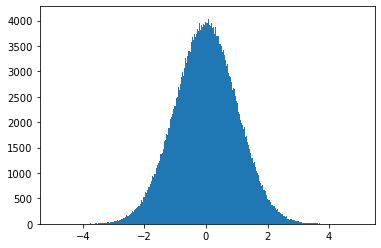

In [27]:
import matplotlib.pyplot as plt

res = [gauss(0, 1) for i in range(1000000)]

plt.hist(res, bins=1000)
plt.show()

【例1】用 random库 实现简单的微信红包分配

In [30]:
import random


def red_packet(total, num):
    for i in range(1, num):
        per = random.uniform(0.01, total/(num-i+1)*2)       # 保证每个人分到红包的期望是 total/(num)
        total = total - per
        print('第{}位红包金额：  {:.2f}元'.format(i, per))
    else:
        print('第{}位红包金额：  {:.2f}元'.format(num, total))        
        
        
red_packet(10, 5)

# 所有都用第一个循环分配的话，总值不一定是 输入的total

第1位红包金额：  1.47元
第2位红包金额：  3.19元
第3位红包金额：  3.22元
第4位红包金额：  1.43元
第5位红包金额：  0.69元


In [35]:
import random
import numpy as np


def red_packet(total, num):
    ls = []
    for i in range(1, num):
        per = round(random.uniform(0.01, total/(num-i+1)*2), 2)       # 均匀分布，保证每个人分到红包的期望是 total/(num)
        ls.append(per)
        total = total - per
    else:
        ls.append(total)
    
    return ls

        
# 重复十万次，统计每个位置的平均值（约等于期望）
res = []
for i in range(100000):
    ls = red_packet(10, 5)
    res.append(ls)
    
res = np.array(res)
print(res[:10])
np.mean(res, axis=0)

[[0.46 3.04 2.12 0.46 3.92]
 [2.78 0.98 0.96 0.87 4.41]
 [1.04 2.55 2.69 3.63 0.09]
 [1.02 0.98 2.56 0.5  4.94]
 [0.97 4.32 1.86 1.36 1.49]
 [2.23 3.81 1.37 1.54 1.05]
 [2.55 2.52 2.22 1.82 0.89]
 [1.49 0.57 4.85 0.85 2.24]
 [2.93 1.86 1.51 0.09 3.61]
 [0.3  1.53 2.89 0.43 4.85]]


array([2.001421 , 2.0036132, 2.0091899, 2.0011004, 1.9846755])

【例2】生产 4 位由数字和英文字母构成的验证码

In [36]:
import random
import string

print(string.digits)
print(string.ascii_letters)

s = string.digits + string.ascii_letters
v = random.sample(s, 4)
print(v)
print(''.join(v))

0123456789
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
['l', 'V', 'a', 'b']
lVab


## collections库————容器数据类型

In [37]:
import collections

**1、namedtuple————具名元组**

- 点的坐标，仅看数据，很难知道表达的是一个点的坐标

In [38]:
p = (1, 2)

- 构建一个新的元组子类

    定义方法如下：typename 是元组名字，field_names 是域名

In [40]:
Point = collections.namedtuple('Point', ['x', 'y'])
p = Point(1, y=2)
p

Point(x=1, y=2)

- 可以调用属性

In [41]:
print(p.x)
print(p.y)

1
2


- 有元组性质

In [42]:
print(p[0])
print(p[1])

x, y = p

print(x)
print(y)

1
2
1
2


- 确实是元组的子类

In [44]:
print(isinstance(p, tuple))

True


【例】模拟扑克牌

In [45]:
Card = collections.namedtuple('Card', ['rank', 'suit'])
ranks = [str(n) for n in range(2, 11)] + list('JQKA')
suits = 'spades diamonds clubs hearts'.split()
print('ranks', ranks)
print('suits', suits)
cards = [Card(rank, suit) for rank in ranks
                for suit in suits]
cards

ranks ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits ['spades', 'diamonds', 'clubs', 'hearts']


[Card(rank='2', suit='spades'),
 Card(rank='2', suit='diamonds'),
 Card(rank='2', suit='clubs'),
 Card(rank='2', suit='hearts'),
 Card(rank='3', suit='spades'),
 Card(rank='3', suit='diamonds'),
 Card(rank='3', suit='clubs'),
 Card(rank='3', suit='hearts'),
 Card(rank='4', suit='spades'),
 Card(rank='4', suit='diamonds'),
 Card(rank='4', suit='clubs'),
 Card(rank='4', suit='hearts'),
 Card(rank='5', suit='spades'),
 Card(rank='5', suit='diamonds'),
 Card(rank='5', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='6', suit='spades'),
 Card(rank='6', suit='diamonds'),
 Card(rank='6', suit='clubs'),
 Card(rank='6', suit='hearts'),
 Card(rank='7', suit='spades'),
 Card(rank='7', suit='diamonds'),
 Card(rank='7', suit='clubs'),
 Card(rank='7', suit='hearts'),
 Card(rank='8', suit='spades'),
 Card(rank='8', suit='diamonds'),
 Card(rank='8', suit='clubs'),
 Card(rank='8', suit='hearts'),
 Card(rank='9', suit='spades'),
 Card(rank='9', suit='diamonds'),
 Card(rank='9', suit='clubs'),


In [46]:
from random import *

In [47]:
# 洗牌
shuffle(cards)
cards

[Card(rank='Q', suit='diamonds'),
 Card(rank='K', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='3', suit='clubs'),
 Card(rank='A', suit='diamonds'),
 Card(rank='J', suit='hearts'),
 Card(rank='J', suit='clubs'),
 Card(rank='7', suit='diamonds'),
 Card(rank='3', suit='hearts'),
 Card(rank='Q', suit='spades'),
 Card(rank='2', suit='spades'),
 Card(rank='8', suit='hearts'),
 Card(rank='10', suit='hearts'),
 Card(rank='J', suit='diamonds'),
 Card(rank='K', suit='spades'),
 Card(rank='9', suit='spades'),
 Card(rank='K', suit='hearts'),
 Card(rank='A', suit='clubs'),
 Card(rank='9', suit='hearts'),
 Card(rank='2', suit='hearts'),
 Card(rank='6', suit='spades'),
 Card(rank='Q', suit='clubs'),
 Card(rank='4', suit='clubs'),
 Card(rank='10', suit='diamonds'),
 Card(rank='4', suit='diamonds'),
 Card(rank='8', suit='diamonds'),
 Card(rank='9', suit='clubs'),
 Card(rank='10', suit='spades'),
 Card(rank='4', suit='spades'),
 Card(rank='5', suit='diamonds'),
 Card(rank='9', suit='diamon

In [48]:
# 随机抽一张牌
choice(cards)

Card(rank='A', suit='clubs')

In [49]:
# 随机抽多张牌
sample(cards, k=5)       # 放回抽用 choices, 不放回用 sample

[Card(rank='J', suit='diamonds'),
 Card(rank='K', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='4', suit='clubs'),
 Card(rank='2', suit='spades')]

In [61]:
cards        # 列表没变，说明并非真正意义上的不放回，只是实现了不放回的功能

[Card(rank='Q', suit='diamonds'),
 Card(rank='K', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='3', suit='clubs'),
 Card(rank='A', suit='diamonds'),
 Card(rank='J', suit='hearts'),
 Card(rank='J', suit='clubs'),
 Card(rank='7', suit='diamonds'),
 Card(rank='3', suit='hearts'),
 Card(rank='Q', suit='spades'),
 Card(rank='2', suit='spades'),
 Card(rank='8', suit='hearts'),
 Card(rank='10', suit='hearts'),
 Card(rank='J', suit='diamonds'),
 Card(rank='K', suit='spades'),
 Card(rank='9', suit='spades'),
 Card(rank='K', suit='hearts'),
 Card(rank='A', suit='clubs'),
 Card(rank='9', suit='hearts'),
 Card(rank='2', suit='hearts'),
 Card(rank='6', suit='spades'),
 Card(rank='Q', suit='clubs'),
 Card(rank='4', suit='clubs'),
 Card(rank='10', suit='diamonds'),
 Card(rank='4', suit='diamonds'),
 Card(rank='8', suit='diamonds'),
 Card(rank='9', suit='clubs'),
 Card(rank='10', suit='spades'),
 Card(rank='4', suit='spades'),
 Card(rank='5', suit='diamonds'),
 Card(rank='9', suit='diamon

**2、Counter————计数器工具**

In [50]:
from collections import Counter

In [51]:
s = 'rygohgoifdobjoigherh'
nums = ['1', '3', '5', '1', '1', '2', '5']
cnt_str = Counter(s)
cnt_num = Counter(nums)
print(cnt_str)
print(cnt_num)

Counter({'o': 4, 'g': 3, 'h': 3, 'r': 2, 'i': 2, 'y': 1, 'f': 1, 'd': 1, 'b': 1, 'j': 1, 'e': 1})
Counter({'1': 3, '5': 2, '3': 1, '2': 1})


- 是字典的一个子类

In [56]:
print(isinstance(Counter(), dict))

True


- 最常见的统计————most_common(n)
    提供 n 个频率最高的元素和计数

In [57]:
cnt_num.most_common(2)

[('1', 3), ('5', 2)]

- 元素展开

In [59]:
list(cnt_num.elements())

['1', '1', '1', '3', '5', '5', '2']

- 其他一些加减操作

In [60]:
c = Counter(a=3, b=1)
d = Counter(a=1, b=2)

c + d

Counter({'a': 4, 'b': 3})

【例】从一副牌中抽取 10 张，大于 10 的比例有多少

In [65]:
cards = collections.Counter(tens=20, low_card=32)    # 比十大的 JQKA2 
seen = sample(list(cards.elements()), k=10)
print(seen)
seen.count('tens') / 10   # 实验次数少，概率会不断变化

['low_card', 'tens', 'low_card', 'low_card', 'low_card', 'low_card', 'low_card', 'low_card', 'low_card', 'low_card']


0.1

**3、deque————双向队列**

列表访问数据非常快速

插入和删除操作非常慢————通过移动元素位置来实现

特别是 insert(0,v) 和 pop(0), 在列表开始进行的插入和删除操作

**双向队列可以方便的在队列两端高效、快速的增删元素**

In [67]:
from collections import deque

d = deque('cde')
d

deque(['c', 'd', 'e'])

In [68]:
d.append('f')       # 右端增加
d.append('g')
d.appendleft('b')   # 左端增加
d.appendleft('a')

d

deque(['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [69]:
d.pop()             # 右端删除
d.popleft()         # 左端删除

d

deque(['b', 'c', 'd', 'e', 'f'])

**deque 其他用法可参考官方文档**

## itertools库————迭代器

**1、排列组合迭代器**

（1）product————笛卡尔积

In [70]:
import itertools

for i in itertools.product('ABC', '01'):
    print(i)

('A', '0')
('A', '1')
('B', '0')
('B', '1')
('C', '0')
('C', '1')


In [71]:
for i in itertools.product('ABC', repeat=3):
    print(i)

('A', 'A', 'A')
('A', 'A', 'B')
('A', 'A', 'C')
('A', 'B', 'A')
('A', 'B', 'B')
('A', 'B', 'C')
('A', 'C', 'A')
('A', 'C', 'B')
('A', 'C', 'C')
('B', 'A', 'A')
('B', 'A', 'B')
('B', 'A', 'C')
('B', 'B', 'A')
('B', 'B', 'B')
('B', 'B', 'C')
('B', 'C', 'A')
('B', 'C', 'B')
('B', 'C', 'C')
('C', 'A', 'A')
('C', 'A', 'B')
('C', 'A', 'C')
('C', 'B', 'A')
('C', 'B', 'B')
('C', 'B', 'C')
('C', 'C', 'A')
('C', 'C', 'B')
('C', 'C', 'C')


（2）permutations————排列

In [73]:
for i in itertools.permutations('ABCD', 3):     # 3 是排列的长度
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'D', 'B')
('A', 'D', 'C')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'D', 'A')
('B', 'D', 'C')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'D', 'A')
('C', 'D', 'B')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'C', 'A')
('D', 'C', 'B')


In [74]:
for i in itertools.permutations(range(3)): 
    print(i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


（3）combinations————组合

In [75]:
for i in itertools.combinations('ABCD', 2):     # 3 是组合的长度
    print(i)

('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')


In [76]:
for i in itertools.combinations(range(4), 3): 
    print(i)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


（4）combinations_with_replacement————元素可重复组合

In [77]:
for i in itertools.combinations_with_replacement('ABC', 2):     # 3 是组合的长度
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')


In [78]:
for i in itertools.product('ABC', repeat=2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'A')
('B', 'B')
('B', 'C')
('C', 'A')
('C', 'B')
('C', 'C')


**笛卡尔积相当于加了顺序这个维度**

**2、拉链**

（1）zip——短拉链

In [80]:
for i in zip('ABC', '012', 'xyz'):
    print(i)

('A', '0', 'x')
('B', '1', 'y')
('C', '2', 'z')


**长短不一时，执行到最短的对象处，就停止**

In [82]:
for i in zip('ABC', '012345'):      # zip 是内置的，不需要加 itertools
    print(i)

('A', '0')
('B', '1')
('C', '2')


（2）zip_longest——长拉链

长度不一时，执行到最长的对象处，就停止，缺省元素用 None 或者 指定字符 代替

In [83]:
for i in itertools.zip_longest('ABC', '012345'):
    print(i)

('A', '0')
('B', '1')
('C', '2')
(None, '3')
(None, '4')
(None, '5')


In [84]:
for i in itertools.zip_longest('ABC', '012345', fillvalue = '？'):
    print(i)

('A', '0')
('B', '1')
('C', '2')
('？', '3')
('？', '4')
('？', '5')


**3、无穷迭代器**

（1）count(start=0, step=1)——计数

    创建一个迭代器，它从 start 值开始，返回均匀间隔的值

（2）cycle(iterable)——循环
    
    创建一个迭代器，返回 iterable 中所有元素，无限重复

（3）repeat(object [, times])——重复

    创建一个迭代器，不断重复 object ，除非设定参数 times ，否则将无限重复

In [86]:
for i in itertools.repeat(10, 3):     # 3 是 times(次数)
    print(i)

10
10
10


**4、其他**

（1）chain(iterables)——锁链

    把一组迭代对象串联起来，形成一个更大的迭代器

In [87]:
for i in itertools.chain('ABC', [1, 2, 3]):
    print(i)

A
B
C
1
2
3


（2）enumerate(iterable, start=0)——枚举

    产出由两个元素组成的元组，结构是 (index, item), 其中 index 从 start 开始，item 从 iterable 中取

In [88]:
for i in enumerate('Python', start=1):
    print(i)

(1, 'P')
(2, 'y')
(3, 't')
(4, 'h')
(5, 'o')
(6, 'n')


（3）goupby(iterable, key=None)——分组

    创建一个迭代器，按照 key 指定的方式，返回 iterable 中连续的键和组
    一般来说，要预先对数据进行排序
    key 为 None 默认把连续重复元素分组

In [90]:
for key, group in itertools.groupby('AAAABBBCCDAABBB'):
    print(key, list(group))

A ['A', 'A', 'A', 'A']
B ['B', 'B', 'B']
C ['C', 'C']
D ['D']
A ['A', 'A']
B ['B', 'B', 'B']


In [91]:
# 一般来说要先排序，因为只能分组连续的重复值

animals = ['duck', 'eagle', 'rat', 'giraffe', 'bear', 'dolphin', 'shark', 'lion']
animals.sort(key=len)      # 按长度进行排序，使用 len
print(animals)

['rat', 'duck', 'bear', 'lion', 'eagle', 'shark', 'giraffe', 'dolphin']


In [92]:
for key, group in itertools.groupby(animals, key = len):    # 即按长度进行分组
    print(key, list(group))

3 ['rat']
4 ['duck', 'bear', 'lion']
5 ['eagle', 'shark']
7 ['giraffe', 'dolphin']


In [93]:
animals = ['duck', 'eagle', 'rat', 'giraffe', 'bear', 'dolphin', 'shark', 'lion']
animals.sort(key=lambda x : x[0])
print(animals)

['bear', 'duck', 'dolphin', 'eagle', 'giraffe', 'lion', 'rat', 'shark']


In [94]:
for key, group in itertools.groupby(animals, key=lambda x : x[0]):    # 即按长度进行分组
    print(key, list(group))

b ['bear']
d ['duck', 'dolphin']
e ['eagle']
g ['giraffe']
l ['lion']
r ['rat']
s ['shark']


**itertools 其他函数可参考官方文档**

# 题目

## 题目一 模拟经典的“三门问题”

### 经典错法！！！

In [95]:
import random
import numpy as np

In [96]:
P_A = random.random()   # 打开 A门 赢的概率
P_A

0.7605582826919427

In [97]:
P_NOT_CHANGE = []       # 不换门的获胜概率
P_CHANGE = []           # 换门的获胜概率

In [98]:
for i in range(10000):
    P_NOT_CHANGE.append(random.random())
    P_CHANGE.append(random.random())
    
P_NOT_CHANGE = np.mean(P_NOT_CHANGE)
P_CHANGE = np.mean(P_CHANGE)

In [99]:
print('P_NOT_CHANGE = {}, P_CHANGE = {}'.format(P_NOT_CHANGE, P_CHANGE))

P_NOT_CHANGE = 0.49732063674720656, P_CHANGE = 0.4967559936837499


### 正确解法之一

In [100]:
import random
P_NOT_CHANGE=0 #不换
P_CHANGE=0 #换

for i in range(10000): #这意味着我们要做1000次实验
    car = random.choice([1,2,3]) #汽车随机出现在三扇门之中
    challenger = random.choice([1,2,3]) #挑战者随机选择了一扇门
    #以下五行代码：主持人随机选择一扇门，这扇门不是挑战者选择的门，也不是汽车所在的门
    host_list = [1,2,3]
    host_list.remove(challenger)
    if car in host_list:
        host_list.remove(car)
    host = random.choice(host_list)
    
    if challenger == car:
        P_NOT_CHANGE = P_NOT_CHANGE+1 #如果挑战者一开始选的门背后有汽车，那么不换是对的
    else:
        P_CHANGE = P_CHANGE+1 #如果挑战者一开始选的门背后没有汽车，那么换是对的
    
print(P_NOT_CHANGE)
print(P_CHANGE)

3243
6757


## 题目二 求解经典的“24点问题”

In [13]:
import operator
from itertools import product, permutations
import time

In [14]:
def mydiv(n, d):
    return n / d if d != 0 else 9999999

In [15]:
syms = [operator.add, operator.sub, operator.mul, mydiv]
op = {sym: ch for sym, ch in zip(syms, '+-*/')}

In [16]:
def solve24(nums):
    for x, y, z in product(syms, repeat=3):
        for a, b, c, d in permutations(nums):
            if round(x(y(a, b), z(c, d)), 5) is 24:
                return f'({a} ({op[y]} {b}) {op[x]} ({c} {op[z]}) {d})'
            elif round(x(a, y(b, z(c, d))), 5) is 24:
                return f'{a} {op[x]} ({b} {op[y]} ({c} {op[z]} {d}))'
            elif round(x(y(z(c, d), b), a), 5) is 24:
                return f'(({c} {op[z]} {d}) {op[y]} {b}) {op[x]} {a}'
            elif round(x(y(b, z(c, d)), a), 5) is 24:
                return f'({b} {op[y]} ({c} {op[z]} {d})) {op[x]} {a}'
    return 'No Answer!'

In [17]:
start_time = time.time()

for nums in [[2, 2, 2, 9],
            [7, 9, 2, 8],
            [7, 7, 1, 2],
            [4, 4, 4, 4],
            [10, 10, 4, 4],
            [5, 5, 1, 5],
            [3, 8, 3, 8]]:
    print(f'solve24({nums}) -> {solve24(nums)}')
end_time = time.time()

print('All the time spended: {}s'.format(end_time - start_time))

solve24([2, 2, 2, 9]) -> 2 + (2 * (2 + 9))
solve24([7, 9, 2, 8]) -> ((7 + 9) * 2) - 8
solve24([7, 7, 1, 2]) -> No Answer!
solve24([4, 4, 4, 4]) -> (4 (+ 4) + (4 *) 4)
solve24([10, 10, 4, 4]) -> No Answer!
solve24([5, 5, 1, 5]) -> No Answer!
solve24([3, 8, 3, 8]) -> No Answer!
All the time spended: 0.02249741554260254s
